# Demo Template Matching using Normalized Cross Correlation

In this lesson we show the template matching method to localize a given pattern in a image. 
We use the NCC - Normalized Cross-Correlation.

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import sys,os
ia898path = os.path.abspath('../../')
if ia898path not in sys.path:
    sys.path.append(ia898path)
import ia898.src as ia

## Image input and template extraction

This code reads a gray scale image and extracts a piece as template. 

""
f: Original Image
""
t: Template

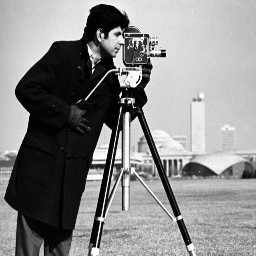

In [6]:
import numpy as np

f = mpimg.imread('../data/cameraman.tif')
nb = ia.nbshow(2)
nb.nbshow(f, title='f: Original Image')
(r0,c0) = 25,106
N = 17
t = f[r0:r0+N,c0:c0+N]
nb.nbshow(t, title='t: Template')
nb.nbshow()

## Direct Image Cross Correlation

Direct image correlation is not a efficient procedure as gray levels and illuminations issues 
contain strong variations. 

$$    
    c(u,v) = \sum_{x,y} f(x,y)t(x-u,y-v)
$$

""
Cross Correlation

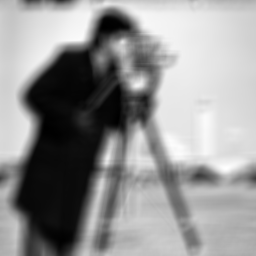

found best match at (152,210)



In [8]:
f=f.astype(np.float)
t=t.astype(np.float)
c = ia.pconv(f, t[::-1,::-1]) 
ia.adshow(ia.normalize(c,[0,255]), title='Cross Correlation')
(row,col) = np.unravel_index(np.argmax(c),c.shape) - np.array([N-1,N-1])    
print('found best match at (%3.0f,%3.0f)\n' %(row,col))

# NCC - Normalized Cross Correlation

It is necessary to subtract the image from it´s mean in order to make 
all regions(light or dark) receive the same importance value.
The normalization factor can be used to improve the model detection.

$$    
    \gamma(u,v) = \frac{\sum_{x,y} [ f(x,y) - \overline{f}_{u,v}][t(x-u,y-v) - \overline{t}]}{\sqrt{\sum_{x,y}[f(x,y)-\overline{f}_{u,v}]^2 \sum_{x,y}[t(x-u,y-u)-\overline{t}]^2}}
$$

If our concert in only to find the maximum response of $\gamma$, 
the above equation can be simplified in:

$$    \gamma_1(u,v) = \frac{\sum_{x,y} [f(x,y) t'(x-u,y-v)]}{\sqrt{\sum_{x,y}[f(x,y)-\overline{f}_{u,v}]^2}}
$$
where $t'$ is the template subtracted from its mean.

The denominator can be further simplified:

$$
    \gamma_1(u,v) = \frac{\sum_{x,y} [f(x,y) t'(x-u,y-v)]}{\sqrt{\sum_{x,y}f^2(x,y)-\frac{1}{n}\sum_{x,y}[f(x,y)]^2}}
$$

Using periodic convolution, the above equation can result in:

$$    
    \gamma_1 = \frac{f \ast (\breve{t}-\overline{t})} {\sqrt{[f^2 \ast i] - \frac{1}{n}(f \ast i)^2}}
$$

found best match at ( 25,106)



""
numerator
""
numerator
""
denominator
""
gamma1

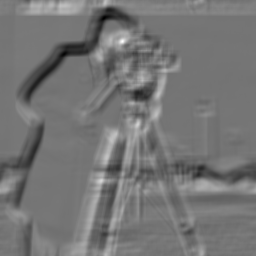
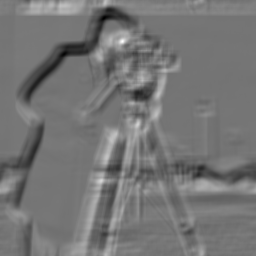
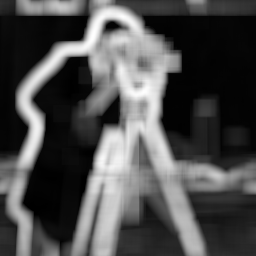
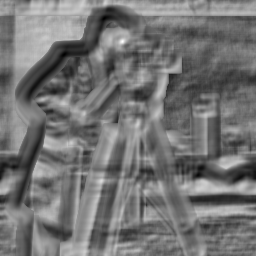

In [12]:
n = t.size
t1 = t[::-1,::-1] - t.mean()
num = ia.pconv(f,t1)
nb.nbshow(ia.normalize(num), title='numerator')
i = np.ones(t.shape)
fm2 = ia.pconv(f*f, i)
fm  = ia.pconv(f,i)
den = np.sqrt(fm2 - fm*fm/n)
nb.nbshow(ia.normalize(den), title='denominator')
gamma1 = num/den
nb.nbshow(ia.normalize(gamma1), title='gamma1')
(row,col) = np.unravel_index(np.argmax(gamma1),gamma1.shape) - np.array([N-1,N-1])
print('found best match at (%3.0f,%3.0f)\n' %(row,col))
nb.nbshow()

# See Also

- [iapconv](../src/pconv.ipynb) - Periodic convolution